#### This notebook solves the equations of motion for the IR theory and determines its screening properties

In [5]:
%matplotlib inline
import sys
# this cumbersome syntax is so that path to my code is prepended instead of appended
sys.path = ['..'] + sys.path

In [6]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import dolfin as d
import numpy as np

from atplmesh import ArcTanPowerLawMesh
from atexpmesh import ArcTanExpMesh

from fem import Fem

from tophatsource import TopHatSource, StepSource
from cossource import CosSource
from gcakesource import GCakeSource

from UV import UVFields, UVSolver

from gravity import PoissonSolver

from utils import project, get_values

First define the problem and the mesh. Every parameter not defined here will be set to its default value. You can visualise your mesh using one of the notebooks provided: ATEMesh.ipynb, EMesh.ipynb, QMesh.ipynb

In [7]:
TH_mesh = ArcTanExpMesh( num_cells=250, r_min=0., r_max=1e9, k=20., b=1e-2, 
                     linear_refine=2, linear_start=1.05, linear_stop=1.2, adjust_transition=True )
TH_fem = Fem( TH_mesh, func_degree=5 )

cos_mesh = ArcTanExpMesh( num_cells=250, r_min=0., r_max=1e9, k=1., b=1e-2, 
                     linear_refine=3, linear_start=1.1, linear_stop=1.25 )
cos_fem = Fem( cos_mesh, func_degree=5 )

GK_mesh = ArcTanExpMesh( num_cells=250, r_min=0., r_max=1e9, k=1., b=1e-2, 
                     linear_refine=3, linear_start=1.1, linear_stop=1.3 )
GK_fem = Fem( GK_mesh, func_degree=5 )

In [8]:
Ms, Rs = 1e10, 1e47
TH_source = TopHatSource( TH_fem, Ms=Ms, Rs=Rs, w=0.02 )
cos_source = CosSource( cos_fem, Ms=Ms, Rs=Rs )
GK_source = GCakeSource( GK_fem, Ms=Ms, Rs=Rs )

fields = UVFields( m=1e-48, M=1e-46 )

In [9]:
TH_uvs = UVSolver( TH_fem, TH_source, fields, Mf1=1e13, Mf2=1e12, rel_res_tol=1e-100, abs_res_tol=1e-83, max_iter=50 )
cos_uvs = UVSolver( cos_fem, cos_source, fields, Mf1=1e13, Mf2=1e12, rel_res_tol=1e-100, abs_res_tol=1e-83, max_iter=50 )
GK_uvs = UVSolver( GK_fem, GK_source, fields, Mf1=1e13, Mf2=1e12, rel_res_tol=1e-100, abs_res_tol=1e-83, max_iter=50 )
solvers = [ TH_uvs, cos_uvs, GK_uvs ]




In [10]:
TH_uvs.solve()
cos_uvs.solve()
GK_uvs.solve()

Non-linear solver, iteration 0	abs_du = 1.0e-51	rel_du = 4.3e-01	abs_res = 4.7e-42 (tol = 1.0e-83)	rel_res = 1.0e+00 (tol = 1.0e-100)
Non-linear solver, iteration 1	abs_du = 6.9e-52	rel_du = 2.9e-01	abs_res = 1.4e-42 (tol = 1.0e-83)	rel_res = 3.0e-01 (tol = 1.0e-100)
Non-linear solver, iteration 2	abs_du = 4.6e-52	rel_du = 1.9e-01	abs_res = 4.2e-43 (tol = 1.0e-83)	rel_res = 8.8e-02 (tol = 1.0e-100)
Non-linear solver, iteration 3	abs_du = 3.0e-52	rel_du = 1.3e-01	abs_res = 1.2e-43 (tol = 1.0e-83)	rel_res = 2.6e-02 (tol = 1.0e-100)
Non-linear solver, iteration 4	abs_du = 2.0e-52	rel_du = 8.5e-02	abs_res = 3.7e-44 (tol = 1.0e-83)	rel_res = 7.7e-03 (tol = 1.0e-100)
Non-linear solver, iteration 5	abs_du = 1.4e-52	rel_du = 5.7e-02	abs_res = 1.1e-44 (tol = 1.0e-83)	rel_res = 2.3e-03 (tol = 1.0e-100)
Non-linear solver, iteration 6	abs_du = 9.0e-53	rel_du = 3.8e-02	abs_res = 3.2e-45 (tol = 1.0e-83)	rel_res = 6.8e-04 (tol = 1.0e-100)
Non-linear solver, iteration 7	abs_du = 6.0e-53	rel_du = 2.5e-

Non-linear solver, iteration 10	abs_du = 2.8e-53	rel_du = 4.1e-03	abs_res = 7.4e-48 (tol = 1.0e-83)	rel_res = 5.2e-06 (tol = 1.0e-100)
Non-linear solver, iteration 11	abs_du = 2.4e-53	rel_du = 3.4e-03	abs_res = 2.2e-48 (tol = 1.0e-83)	rel_res = 1.5e-06 (tol = 1.0e-100)
Non-linear solver, iteration 12	abs_du = 3.1e-53	rel_du = 4.5e-03	abs_res = 6.5e-49 (tol = 1.0e-83)	rel_res = 4.6e-07 (tol = 1.0e-100)
Non-linear solver, iteration 13	abs_du = 2.8e-53	rel_du = 4.0e-03	abs_res = 1.9e-49 (tol = 1.0e-83)	rel_res = 1.4e-07 (tol = 1.0e-100)
Non-linear solver, iteration 14	abs_du = 3.1e-53	rel_du = 4.5e-03	abs_res = 5.7e-50 (tol = 1.0e-83)	rel_res = 4.0e-08 (tol = 1.0e-100)
Non-linear solver, iteration 15	abs_du = 3.1e-53	rel_du = 4.5e-03	abs_res = 1.7e-50 (tol = 1.0e-83)	rel_res = 1.2e-08 (tol = 1.0e-100)
Non-linear solver, iteration 16	abs_du = 3.2e-53	rel_du = 4.7e-03	abs_res = 5.0e-51 (tol = 1.0e-83)	rel_res = 3.5e-09 (tol = 1.0e-100)
Non-linear solver, iteration 17	abs_du = 3.3e-53	rel_du

Non-linear solver, iteration 20	abs_du = 3.3e-54	rel_du = 4.8e-04	abs_res = 1.9e-53 (tol = 1.0e-83)	rel_res = 2.2e-11 (tol = 1.0e-100)
Non-linear solver, iteration 21	abs_du = 3.5e-54	rel_du = 5.2e-04	abs_res = 3.6e-54 (tol = 1.0e-83)	rel_res = 4.4e-12 (tol = 1.0e-100)
Non-linear solver, iteration 22	abs_du = 3.3e-54	rel_du = 4.9e-04	abs_res = 3.1e-55 (tol = 1.0e-83)	rel_res = 3.7e-13 (tol = 1.0e-100)
Non-linear solver, iteration 23	abs_du = 1.1e-54	rel_du = 1.6e-04	abs_res = 4.1e-57 (tol = 1.0e-83)	rel_res = 4.9e-15 (tol = 1.0e-100)
Non-linear solver, iteration 24	abs_du = 4.4e-56	rel_du = 6.4e-06	abs_res = 1.2e-60 (tol = 1.0e-83)	rel_res = 1.4e-18 (tol = 1.0e-100)
Non-linear solver, iteration 25	abs_du = 6.4e-59	rel_du = 9.4e-09	abs_res = 7.5e-61 (tol = 1.0e-83)	rel_res = 9.1e-19 (tol = 1.0e-100)
Non-linear solver, iteration 26	abs_du = 5.6e-59	rel_du = 8.3e-09	abs_res = 7.1e-61 (tol = 1.0e-83)	rel_res = 8.6e-19 (tol = 1.0e-100)
Non-linear solver, iteration 27	abs_du = 6.4e-59	rel_du

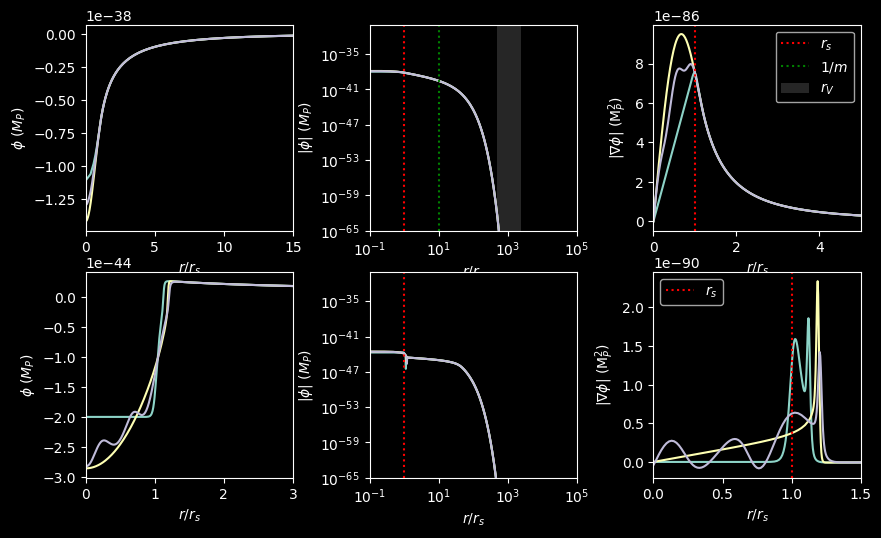

In [12]:
fig=plt.figure(figsize=(10, 6), dpi=100 )

# field around the source
plt.subplot(231)
for i, uvs in enumerate(solvers):
    r_values, Phi_values = get_values( uvs.Phi, output_mesh=True )
    plt.plot( r_values, Phi_values )
plt.ylabel(r'$\phi$ ($M_P$)')
plt.xlabel(r'$r/r_s$')
# plot a vertical line where the transition source-vacuum happens
#plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':')
plt.gca().axvspan( 700, 1000, facecolor='grey', alpha=0.3, label=r'$r_V$')
plt.xlim([ 0., 15. ])

plt.subplot(232)
for i, uvs in enumerate(solvers):
    r_values, Phi_values = get_values( uvs.Phi, output_mesh=True )
    plt.plot( r_values, abs(Phi_values) )
plt.ylabel(r'$|\phi|$ ($M_P$)')
plt.xlabel(r'$r/r_s$')
# plot a vertical line where the transition source-vacuum happens
plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':', label=r'$r_s$')
plt.axvline(x=uvs.Mn / uvs.fields.m, linestyle=':', color='green', label=r'$1/m$')
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-65, 1e-30])
plt.xlim(1e-1, 1e5)
plt.gca().axvspan( 500, 2400, facecolor='grey', alpha=0.3, label=r'$r_V$')
#plt.legend()

plt.subplot(233)
for i, uvs in enumerate(solvers):
    r_values, grad_Phi_values = get_values( uvs.grad_Phi, output_mesh=True )
    plt.plot( r_values, grad_Phi_values )
plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':', label=r'$r_s$')
plt.axvline(x=1./uvs.fields.m, color='green', linestyle=':', label=r'$1/m$')
plt.gca().axvspan( 500, 2400, facecolor='grey', alpha=0.3, label=r'$r_V$')
plt.ylabel(r'$|\nabla\phi|$ ($\mathrm{M}_P^2$)')
plt.xlabel(r'$r/r_s$')
plt.xlim(0., 5.)
plt.legend()

plt.subplot(234)
for i, uvs in enumerate(solvers):
    r_values, H_values = get_values( uvs.H, output_mesh=True )
    plt.plot( r_values, H_values )
plt.ylabel(r'$\phi$ ($M_P$)')
plt.xlabel(r'$r/r_s$')
# plot a vertical line where the transition source-vacuum happens
#plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':')
plt.xlim([ 0., 3. ])

plt.subplot(235)
for i, uvs in enumerate(solvers):
    r_values, H_values = get_values( uvs.H, output_mesh=True )
    plt.plot( r_values, abs(H_values) )
plt.ylabel(r'$|\phi|$ ($M_P$)')
plt.xlabel(r'$r/r_s$')
# plot a vertical line where the transition source-vacuum happens
plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':', label=r'$r_s$')
#plt.axvline(x=uvs.Mn / uvs.fields.M, linestyle=':', color='black', label=r'$1/M$')
#plt.axvline(x=uvs.Mn/uvs.fields.m, color='green', linestyle=':', label=r'$1/m$')
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-65, 1e-30])
plt.xlim(1e-1, 1e5)
#plt.legend()

plt.subplot(236)
for i, uvs in enumerate(solvers):
    r_values, grad_H_values = get_values( uvs.grad_H, output_mesh=True )
    plt.plot( r_values, grad_H_values )
plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':', label=r'$r_s$')
plt.ylabel(r'$|\nabla\phi|$ ($\mathrm{M}_P^2$)')
plt.xlabel(r'$r/r_s$')
plt.xlim(0., 1.5)
plt.legend()


plt.subplots_adjust(wspace=0.37)

In [18]:
# trying with numpy off-docker
root = './data/Wiggle_'
sources = [ 'TH_', 'cos_', 'GK_' ]
for i, uvs in enumerate( solvers ):
    fileroot = root + sources[i]
    r_values, Phi_values = get_values( uvs.Phi, output_mesh=True )
    H_values = get_values( uvs.H )
    grad_Phi_values = get_values( uvs.grad_Phi )
    grad_H_values = get_values( uvs.grad_H )
    np.save( fileroot + 'r_values', r_values )
    np.save( fileroot + 'Phi_values', Phi_values )
    np.save( fileroot + 'H_values', H_values )
    np.save( fileroot + 'grad_Phi_values', grad_Phi_values )
    np.save( fileroot + 'grad_H_values', grad_H_values )

In [14]:
# now I study the impact of the source width on the wiggles
w_array = np.array([ 7e-3, 1.5e-2, 3e-2, 6e-2 ])
w_solvers = []
lin_ref_extrema = ( ( 1., 1.1 ), ( 1.05, 1.15 ), ( 1.13, 1.2 ), ( 1.2, 1.35 ) )
lin_ref_times = [  3, 2, 2, 2 ]
for i, w in enumerate( w_array ):
    linear_start, linear_stop = lin_ref_extrema[i]
    times = lin_ref_times[i]
    mesh = ArcTanExpMesh( num_cells=250, r_min=0., r_max=1e9, k=20., b=1e-2, 
                     linear_refine=2, linear_start=linear_start, 
                    linear_stop=linear_stop, adjust_transition=True )
    fem = Fem( mesh, func_degree=5 )
    source = TopHatSource( fem, Ms=Ms, Rs=Rs, w=w )
    uvs = UVSolver( fem, source, fields, Mf1=1e13, Mf2=1e12, rel_res_tol=1e-100,
                   abs_res_tol=-100, max_iter=50 )
    uvs.solve()
    w_solvers.append( uvs ) 

Non-linear solver, iteration 0	abs_du = 1.4e-51	rel_du = 5.0e-01	abs_res = 4.3e-42 (tol = -1.0e+02)	rel_res = 1.0e+00 (tol = 1.0e-100)
Non-linear solver, iteration 1	abs_du = 9.7e-52	rel_du = 3.3e-01	abs_res = 1.3e-42 (tol = -1.0e+02)	rel_res = 3.0e-01 (tol = 1.0e-100)
Non-linear solver, iteration 2	abs_du = 6.4e-52	rel_du = 2.2e-01	abs_res = 3.8e-43 (tol = -1.0e+02)	rel_res = 8.8e-02 (tol = 1.0e-100)
Non-linear solver, iteration 3	abs_du = 4.3e-52	rel_du = 1.5e-01	abs_res = 1.1e-43 (tol = -1.0e+02)	rel_res = 2.6e-02 (tol = 1.0e-100)
Non-linear solver, iteration 4	abs_du = 2.9e-52	rel_du = 9.9e-02	abs_res = 3.3e-44 (tol = -1.0e+02)	rel_res = 7.7e-03 (tol = 1.0e-100)
Non-linear solver, iteration 5	abs_du = 1.9e-52	rel_du = 6.6e-02	abs_res = 9.9e-45 (tol = -1.0e+02)	rel_res = 2.3e-03 (tol = 1.0e-100)
Non-linear solver, iteration 6	abs_du = 1.3e-52	rel_du = 4.4e-02	abs_res = 2.9e-45 (tol = -1.0e+02)	rel_res = 6.8e-04 (tol = 1.0e-100)
Non-linear solver, iteration 7	abs_du = 8.5e-53	rel_du 

Non-linear solver, iteration 9	abs_du = 3.0e-53	rel_du = 1.3e-02	abs_res = 8.0e-47 (tol = -1.0e+02)	rel_res = 1.8e-05 (tol = 1.0e-100)
Non-linear solver, iteration 10	abs_du = 3.0e-53	rel_du = 1.3e-02	abs_res = 2.4e-47 (tol = -1.0e+02)	rel_res = 5.2e-06 (tol = 1.0e-100)
Non-linear solver, iteration 11	abs_du = 3.0e-53	rel_du = 1.3e-02	abs_res = 7.0e-48 (tol = -1.0e+02)	rel_res = 1.5e-06 (tol = 1.0e-100)
Non-linear solver, iteration 12	abs_du = 3.1e-53	rel_du = 1.3e-02	abs_res = 2.1e-48 (tol = -1.0e+02)	rel_res = 4.6e-07 (tol = 1.0e-100)
Non-linear solver, iteration 13	abs_du = 3.1e-53	rel_du = 1.3e-02	abs_res = 6.1e-49 (tol = -1.0e+02)	rel_res = 1.4e-07 (tol = 1.0e-100)
Non-linear solver, iteration 14	abs_du = 3.1e-53	rel_du = 1.3e-02	abs_res = 1.8e-49 (tol = -1.0e+02)	rel_res = 4.0e-08 (tol = 1.0e-100)
Non-linear solver, iteration 15	abs_du = 3.1e-53	rel_du = 1.3e-02	abs_res = 5.4e-50 (tol = -1.0e+02)	rel_res = 1.2e-08 (tol = 1.0e-100)
Non-linear solver, iteration 16	abs_du = 3.1e-53	

Non-linear solver, iteration 18	abs_du = 3.0e-53	rel_du = 1.2e-02	abs_res = 1.6e-51 (tol = -1.0e+02)	rel_res = 3.0e-10 (tol = 1.0e-100)
Non-linear solver, iteration 19	abs_du = 2.6e-53	rel_du = 1.1e-02	abs_res = 4.4e-52 (tol = -1.0e+02)	rel_res = 8.1e-11 (tol = 1.0e-100)
Non-linear solver, iteration 20	abs_du = 1.9e-53	rel_du = 7.6e-03	abs_res = 9.7e-53 (tol = -1.0e+02)	rel_res = 1.8e-11 (tol = 1.0e-100)
Non-linear solver, iteration 21	abs_du = 7.9e-54	rel_du = 3.2e-03	abs_res = 1.1e-53 (tol = -1.0e+02)	rel_res = 2.1e-12 (tol = 1.0e-100)
Non-linear solver, iteration 22	abs_du = 7.8e-55	rel_du = 3.1e-04	abs_res = 2.4e-55 (tol = -1.0e+02)	rel_res = 4.5e-14 (tol = 1.0e-100)
Non-linear solver, iteration 23	abs_du = 7.2e-57	rel_du = 2.9e-06	abs_res = 1.2e-58 (tol = -1.0e+02)	rel_res = 2.1e-17 (tol = 1.0e-100)
Non-linear solver, iteration 24	abs_du = 4.2e-58	rel_du = 1.7e-07	abs_res = 4.6e-60 (tol = -1.0e+02)	rel_res = 8.5e-19 (tol = 1.0e-100)
Non-linear solver, iteration 25	abs_du = 2.6e-58

Non-linear solver, iteration 27	abs_du = 5.3e-59	rel_du = 1.7e-08	abs_res = 7.2e-61 (tol = -1.0e+02)	rel_res = 7.2e-20 (tol = 1.0e-100)
Non-linear solver, iteration 28	abs_du = 7.3e-59	rel_du = 2.4e-08	abs_res = 1.2e-60 (tol = -1.0e+02)	rel_res = 1.2e-19 (tol = 1.0e-100)
Non-linear solver, iteration 29	abs_du = 5.9e-59	rel_du = 1.9e-08	abs_res = 6.2e-61 (tol = -1.0e+02)	rel_res = 6.3e-20 (tol = 1.0e-100)
Non-linear solver, iteration 30	abs_du = 6.7e-59	rel_du = 2.2e-08	abs_res = 5.2e-61 (tol = -1.0e+02)	rel_res = 5.2e-20 (tol = 1.0e-100)
Non-linear solver, iteration 31	abs_du = 7.2e-59	rel_du = 2.4e-08	abs_res = 7.9e-61 (tol = -1.0e+02)	rel_res = 7.9e-20 (tol = 1.0e-100)
Non-linear solver, iteration 32	abs_du = 7.8e-59	rel_du = 2.6e-08	abs_res = 8.8e-61 (tol = -1.0e+02)	rel_res = 8.9e-20 (tol = 1.0e-100)
Non-linear solver, iteration 33	abs_du = 3.9e-59	rel_du = 1.3e-08	abs_res = 8.3e-61 (tol = -1.0e+02)	rel_res = 8.3e-20 (tol = 1.0e-100)
Non-linear solver, iteration 34	abs_du = 5.2e-59

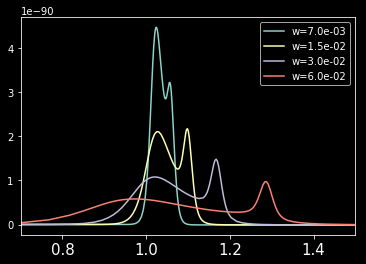

In [15]:
plt.rcParams['xtick.labelsize']=15
plt.rcParams.update()
for i, uvs in enumerate( w_solvers ):
    r_values, grad_H_values = get_values( uvs.grad_H, output_mesh=True )
#    plt.plot( r_values, grad_H_values, '.', markersize='3', label='w=%.1e' % w_array[i] )
    plt.plot( r_values, grad_H_values, label='w=%.1e' % w_array[i] )

plt.xlim(0.7,1.5)
plt.gca().spines['bottom'].set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.legend()

In [19]:
# now save the arrays and do it off-docker
for i, uvs in enumerate( w_solvers ):
    root = './data/w=%2.1e_' % w_array[i]
    r_values, grad_H_values = get_values( uvs.grad_H, output_mesh=True )
    np.save( root + 'r_values', r_values )
    np.save( root + 'grad_H_values', grad_H_values )